# Text to Text Similarity : Wu & Palmer 1994

The Wu & Palmer similarity measures the depth of two given concepts in the WordNet taxonomy and the depth of the least common subsumer (LCS) [1],
and combines these into a similarity score.

$$
Sim_{wup} = \frac{2 * depth(LCS)}{depth(concept_{1}) + depth(concept_{2})}
$$

The LCS is the most specific concept which is an ancestor of both $concept_{1}$ and $concept_{2}$.

For example.
1. The concept Automobile is an ancestor of Car. Car has a depth of 3 and Automobile has a depth of 2.
2. Vehicle is an ancestor of Boat and Automobile. (Vehicle depth = 1, Boat depth = 2, Object depth = 0)

```
    Object
      |
    Vehicle
      |
  ---------
  |       |
 Boat  Automobile
          |
         Car
```

Thus the Least Common Subsumer (Ancestor) of *Car* and *Boat* is *Vehicle*.
So the *WU Palmer Similarity* of `WUPS(Boat, Car)` = $\frac{2\cdot 1}{2 + 3} = 0.4$.

Intuitively, words which are very close in meaning say *dog* and *canine* will have a LCS with a high depth and their respective value will approach one. For words whose LCS is the root of the wordnet node hierarchy they will have a similarity of 0.

#### REFERENCES
1. [Wu & Palmer - Verb Semantics and Lexical Selection](./papers/Wu_Palmer_1994-verb-semantics-and-lexical-selection.pdf)
2. [Least Common Subsumer](https://stackoverflow.com/questions/18629469/what-is-least-common-subsumer-and-how-to-compute-it)

In [5]:
import sys
import numpy as np
sys.path.append('../')
import libs.utils as utils
import libs.stats as stats
import libs.preprocessing as pp
import libs.text2text as tt
from importlib import reload
import spacy

In [2]:
# Load Dataset
df2_en = utils.load_dataframe(language='en', version=2)
print(len(df2_en))

nlp_en = spacy.load('en')

2442


## E1.1 v2.0_en

In [6]:
e11_res = tt.run_entailment_model(nlp_en, df2_en, 
                                  sim_fn=tt.wup_similarity, 
                                  lang='eng',
                                  stop_words=pp.EN_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB', 'ADJ'])

batch: 300 done.
batch: 600 done.
batch: 900 done.
batch: 1200 done.
batch: 1500 done.
batch: 1800 done.
batch: 2100 done.
batch: 2400 done.


Accuracy: 39.558%
Precision: 55.613%
Recall: 39.558%
F1-Measure: 43.278%
Pearson's R: 0.32
Cohen's Kappa: 0.18
RMSE: 1.48
MAE: 0.99
Y-True Mean: 4.15
Y-Pred Mean: 3.64
Y-True Std Deviation: 1.12
Y-Pred Std Deviation: 1.27


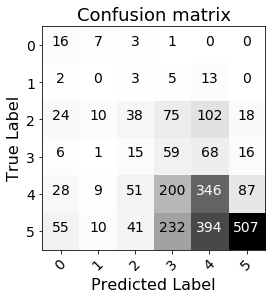

In [7]:
stats.print_big4(e11_res['y_true'], e11_res['y_pred'])
stats.print_stats(e11_res['y_true'], e11_res['y_pred'])
stats.plot_confusion_matrix(stats.cm(e11_res['y_true'], e11_res['y_pred']), classes=np.unique(e11_res['y_true']))

## E1.1a v2.0_en Pass / Fail

Accuracy: 82.391%
Precision: 82.439%
Recall: 82.391%
F1-Measure: 82.415%
Pearson's R: 0.22
Cohen's Kappa: 0.22
RMSE: 0.42
MAE: 0.18
Y-True Mean: 0.87
Y-Pred Mean: 0.87
Y-True Std Deviation: 0.34
Y-Pred Std Deviation: 0.34


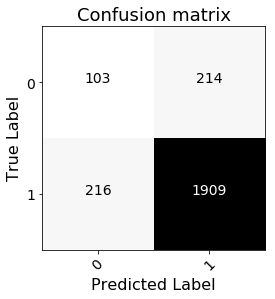

In [10]:
e11_res_pf_t = utils.convert_to_pass_fail(e11_res['y_true'])
e11_res_pf_p = utils.convert_to_pass_fail(e11_res['y_pred'])

stats.print_big4(e11_res_pf_t, e11_res_pf_p)
stats.print_stats(e11_res_pf_t, e11_res_pf_p)
stats.plot_confusion_matrix(stats.cm(e11_res_pf_t, e11_res_pf_p), classes=np.unique(e11_res_pf_t))

## E1.2 v1.0_en (comparison with another Dataset)

In [8]:
# Load Dataset
df1_en = utils.load_dataframe(language='en', version=1)
print(len(df1_en))

e12_res = tt.run_entailment_model(nlp_en, df1_en,
                                  sim_fn=tt.wup_similarity, 
                                  lang='eng',
                                  stop_words=pp.EN_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB', 'ADJ'])

630
batch: 300 done.
batch: 600 done.


Accuracy: 42.857%
Precision: 48.357%
Recall: 42.857%
F1-Measure: 44.480%
Pearson's R: 0.35
Cohen's Kappa: 0.19
RMSE: 1.41
MAE: 0.94
Y-True Mean: 4.03
Y-Pred Mean: 3.78
Y-True Std Deviation: 1.18
Y-Pred Std Deviation: 1.25


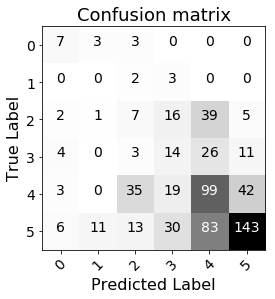

In [9]:
stats.print_big4(e12_res['y_true'], e12_res['y_pred'])
stats.print_stats(e12_res['y_true'], e12_res['y_pred'])
stats.plot_confusion_matrix(stats.cm(e12_res['y_true'], e12_res['y_pred']), classes=np.unique(e12_res['y_true']))

## E1.3 v2.0_es

In [12]:
# Load Dataset
df2_es = utils.load_dataframe(language='es', version=2)
print(len(df2_es))

nlp_es = spacy.load('es')

e13_res = tt.run_entailment_model(nlp_es, df2_es,
                                  sim_fn=tt.wup_similarity, 
                                  lang='spa',
                                  stop_words=pp.ES_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB', 'ADJ'])

2442
batch: 300 done.
batch: 600 done.
batch: 900 done.
batch: 1200 done.
batch: 1500 done.
batch: 1800 done.
batch: 2100 done.
batch: 2400 done.


Accuracy: 16.667%
Precision: 55.726%
Recall: 16.667%
F1-Measure: 20.801%
Pearson's R: 0.22
Cohen's Kappa: 0.04
RMSE: 2.49
MAE: 2.02
Y-True Mean: 4.15
Y-Pred Mean: 2.27
Y-True Std Deviation: 1.12
Y-Pred Std Deviation: 1.46


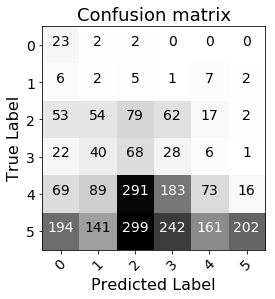

In [13]:
stats.print_big4(e13_res['y_true'], e13_res['y_pred'])
stats.print_stats(e13_res['y_true'], e13_res['y_pred'])
stats.plot_confusion_matrix(stats.cm(e13_res['y_true'], e13_res['y_pred']), classes=np.unique(e13_res['y_true']))

## E1.3b v2.0_es Pass / Fail

Accuracy: 46.601%
Precision: 81.163%
Recall: 46.601%
F1-Measure: 54.084%
Pearson's R: 0.10
Cohen's Kappa: 0.06
RMSE: 0.73
MAE: 0.53
Y-True Mean: 0.87
Y-Pred Mean: 0.41
Y-True Std Deviation: 0.34
Y-Pred Std Deviation: 0.49


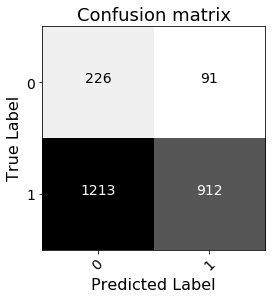

In [15]:
e13_res_pf_t = utils.convert_to_pass_fail(e13_res['y_true'])
e13_res_pf_p = utils.convert_to_pass_fail(e13_res['y_pred'])

stats.print_big4(e13_res_pf_t, e13_res_pf_p)
stats.print_stats(e13_res_pf_t, e13_res_pf_p)
stats.plot_confusion_matrix(stats.cm(e13_res_pf_t, e13_res_pf_p), classes=np.unique(e13_res_pf_p))

## E1.4 v1.0_es

In [16]:
df1_es = utils.load_dataframe(language='es', version=1)
print(len(df1_es))

nlp_es = spacy.load('es')

e14_res = tt.run_entailment_model(nlp_es, df1_es,
                                  sim_fn=tt.wup_similarity, 
                                  lang='spa',
                                  stop_words=pp.ES_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB', 'ADJ'])

630
batch: 300 done.
batch: 600 done.


Accuracy: 19.524%
Precision: 55.077%
Recall: 19.524%
F1-Measure: 22.671%
Pearson's R: 0.21
Cohen's Kappa: 0.07
RMSE: 2.34
MAE: 1.84
Y-True Mean: 4.03
Y-Pred Mean: 2.37
Y-True Std Deviation: 1.18
Y-Pred Std Deviation: 1.43


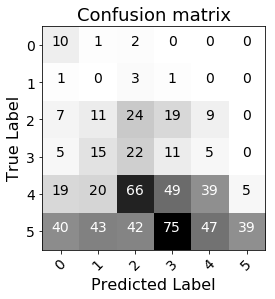

In [17]:
stats.print_big4(e14_res['y_true'], e14_res['y_pred'])
stats.print_stats(e14_res['y_true'], e14_res['y_pred'])
stats.plot_confusion_matrix(stats.cm(e14_res['y_true'], e14_res['y_pred']), classes=np.unique(e14_res['y_true']))

## Notes : Interpretation and Findings of Wu & Palmer Similarity

The WUP score represents a marked improvement in *accuracy*, *recall*, and *f1 score* with an accompanying decrease in precision over the *Leacock & Chodorow* algorithm. Its Mean is much closer to the true mean and its RMSE is also slightly lower (from 1.66 to 1.63).

What are the reasons for this slight improvement?

Perhaps, since Leacock and Chodorow looks at the distance between 2 concepts normalized by the depth of the hierarchy it doesn't take as much overlapping meaning into account which is subsumed by the ancestor concept. The Wu & Palmer approach makes the ancestor more important which broadens the field of meaning making it more fuzzy, that could explain the lower precision and higher accuracy scores.